In [1]:
#!pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
len(x_train)

60000

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

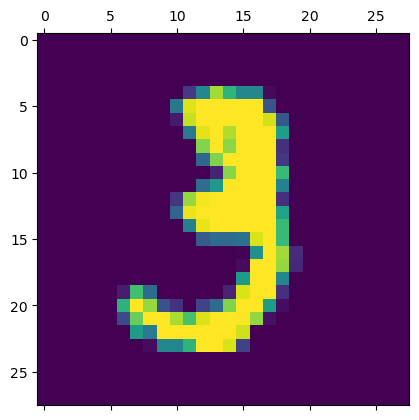

In [55]:
plt.matshow(x_train[10])

In [8]:
y_train[2]

4

In [9]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [10]:
x_train = x_train/255
x_test = x_test/255

In [11]:
x_train_flattened= x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [12]:
x_train_flattened.shape

(60000, 784)

In [13]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [14]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'), 
    keras.layers.Dense(10,activation='sigmoid')
])

model. compile(

    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened,y_train, epochs=5)


Epoch 1/5


C:\Users\Anik\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 632us/step - accuracy: 0.8808 - loss: 0.4318
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 657us/step - accuracy: 0.9622 - loss: 0.1316
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 648us/step - accuracy: 0.9722 - loss: 0.0914
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 639us/step - accuracy: 0.9805 - loss: 0.0656
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 649us/step - accuracy: 0.9846 - loss: 0.0496


In [15]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [16]:
model.evaluate(x_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - accuracy: 0.9722 - loss: 0.0914


[0.0816485658288002, 0.9760000109672546]

In [17]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\Anik\AppData\Local\Temp\tmpqjxtp2gg\assets


INFO:tensorflow:Assets written to: C:\Users\Anik\AppData\Local\Temp\tmpqjxtp2gg\assets


Saved artifact at 'C:\Users\Anik\AppData\Local\Temp\tmpqjxtp2gg'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 784), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  2429730635408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2429730632336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2429804742032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2429804742992: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [18]:
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)